In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
#keep things general at first, then we can get into specifics later

#define starting particle as parent
#define two ending particles as daughters

#input is a list of 4-momenta for the parent
#output is the 4-momenta for one of the daughters

#assuming that we know the masses of all of the particles involved (placeholders for now) + p/E of parent
mass_parent = 10
mass_daughter_1 = 6 #set as gamma for now
mass_daughter_2 = 4 #set as A' for now
momentum_parent = 20 #in lab frame, set to pion for now
E_parent = np.sqrt(mass_parent**2 + momentum_parent**2)
print("Energy of Parent: " + str(E_parent))
print("Momentum of Parent: " + str(momentum_parent))

def find_two_daughter_momenta(mass_parent, mass_daughter_1, mass_daughter_2, momentum_parent, E_parent):
    #in the COM frame, we have (1 always forwards, 2 always back):
    E_daughter_1_COM = (mass_parent**2 + mass_daughter_1**2 - mass_daughter_2**2)/(2*mass_parent)
    E_daughter_2_COM = mass_parent - E_daughter_1_COM
    
    p_daughter_2_COM = np.sqrt(E_daughter_2_COM**2 - mass_daughter_2**2)
    p_daughter_1_COM = -p_daughter_2_COM

    #in the lab frame, we have (1 always forwards, 2 always back):
    p_daughter_1_lab = pd.DataFrame((E_parent/mass_parent)*(p_daughter_1_COM + (momentum_parent/E_parent)*E_daughter_1_COM))
    p_daughter_2_lab = pd.DataFrame((E_parent/mass_parent)*(p_daughter_2_COM + (momentum_parent/E_parent)*E_daughter_2_COM))
    
    return pd.concat([p_daughter_1_lab, p_daughter_2_lab], axis = 1, keys = ["p_daughter_1_lab", "p_daughter_2_lab"])
    
#print("\nwithout angles output: ")
#print(find_two_daughter_momenta(mass_parent, mass_daughter_1, mass_daughter_2, momentum_parent, E_parent))

#now with angles (assuming they are specified)
theta_daughter_2 = 2 #assuming in x-direction, from 0-180 deg.(0-3.14 rad.)
phi_daughter_2 = 5 #assuming in y-direction, from 0-360 deg. (0-6.28 rad.)

def find_two_daughter_momenta_angles(theta_daughter_2, phi_daughter_2, mass_parent, mass_daughter_1, mass_daughter_2, momentum_parent, E_parent):
    #in the COM frame:
    E_daughter_1_COM = (mass_parent**2 + mass_daughter_1**2 - mass_daughter_2**2)/(2*mass_parent)
    E_daughter_2_COM = mass_parent - E_daughter_1_COM
    
    #find total momentum
    p_daughter_2_tot_COM = np.sqrt(E_daughter_2_COM**2 - mass_daughter_2**2)
    p_daughter_1_tot_COM = -p_daughter_2_tot_COM
    
    #set sin(2pi) = 0:
    if np.allclose(np.sin(theta_daughter_2), 0) == True:
        theta_daughter_2 = 0
    
    #find components, assuming angles are defined like spherical coord.
    p_daughter_2_x_COM = p_daughter_2_tot_COM*np.sin(theta_daughter_2)*np.cos(phi_daughter_2)
    p_daughter_2_y_COM = p_daughter_2_tot_COM*np.sin(theta_daughter_2)*np.sin(phi_daughter_2)
    p_daughter_2_z_COM = p_daughter_2_tot_COM*np.cos(theta_daughter_2)
    
    p_daughter_1_x_COM = -p_daughter_2_x_COM
    p_daughter_1_y_COM = -p_daughter_2_y_COM
    p_daughter_1_z_COM = -p_daughter_2_z_COM

    #in the lab frame, boosting only in z direction:
    p_daughter_1_z_lab = (E_parent/mass_parent)*(p_daughter_1_z_COM + (momentum_parent/E_parent)*E_daughter_1_COM)
    p_daughter_1_z_lab_df = pd.DataFrame((E_parent/mass_parent)*(p_daughter_1_z_COM + (momentum_parent/E_parent)*E_daughter_1_COM))
    p_daughter_1_x_lab = p_daughter_1_x_COM
    p_daughter_1_y_lab = p_daughter_1_y_COM
    
    p_daughter_2_z_lab = (E_parent/mass_parent)*(p_daughter_2_z_COM + (momentum_parent/E_parent)*E_daughter_2_COM)
    p_daughter_2_z_lab_df = pd.DataFrame((E_parent/mass_parent)*(p_daughter_2_z_COM + (momentum_parent/E_parent)*E_daughter_2_COM))
    p_daughter_2_x_lab = p_daughter_2_x_COM
    p_daughter_2_y_lab = p_daughter_2_y_COM
    
    #find total momentum now
    p_daughter_2_tot_lab = pd.DataFrame(np.sqrt(p_daughter_2_z_lab**2 + p_daughter_2_x_lab**2 + p_daughter_2_y_lab**2))
    p_daughter_1_tot_lab = pd.DataFrame(np.sqrt(p_daughter_1_z_lab**2 + p_daughter_1_x_lab**2 + p_daughter_1_y_lab**2))
    
    #find the new angles in the lab frame
    theta_daughter_1_lab = pd.DataFrame(np.arccos(p_daughter_1_z_lab/p_daughter_1_tot_lab))
    #doesn't change b/c boosting only in z direction
    phi_daughter_1_lab = pd.DataFrame(np.arctan2(p_daughter_1_y_lab, p_daughter_1_x_lab) + np.pi)
    
    theta_daughter_2_lab = pd.DataFrame(np.arccos(p_daughter_2_z_lab/p_daughter_2_tot_lab))
    #same as 1st b/c boosting only in z direction
    phi_daughter_2_lab = phi_daughter_1_lab
    
    #find the energy in the lab frame
    E_daughter_1_lab = pd.DataFrame((E_parent/mass_parent)*(E_daughter_1_COM - (momentum_parent/E_parent)*p_daughter_1_z_COM))
    E_daughter_2_lab = pd.DataFrame((E_parent/mass_parent)*(E_daughter_2_COM - (momentum_parent/E_parent)*p_daughter_2_z_COM))
    
    return pd.concat([E_daughter_1_lab, p_daughter_1_z_lab_df, p_daughter_1_tot_lab, E_daughter_2_lab, p_daughter_2_z_lab_df, p_daughter_2_tot_lab], axis = 1, keys = ["E_daughter_1_lab", "p_daughter_1_z_lab", "p_daughter_1_tot_lab", "E_daughter_2_lab", "p_daughter_2_z_lab", "p_daughter_2_tot_lab"])

#test = find_two_daughter_momenta_angles(theta_daughter_2, phi_daughter_2, mass_parent, mass_daughter_1, mass_daughter_2, momentum_parent, E_parent)
#print("\nwith angles output: ")
#print(test)

#check energy/momentum conservation
'''E_cons_lab = test[0][0] + test[1][0]
p_x_cons_lab = test[0][1] + test[1][1]
p_y_cons_lab = test[0][2] + test[1][2]
p_z_cons_lab = test[0][3] + test[1][3]
print("\nEnergy Conservation Check: " + str(E_cons_lab))
print("x Momentum Conservation Check: " + str(p_x_cons_lab))
print("y Momentum Conservation Check: " + str(p_y_cons_lab))
print("z Momentum Conservation Check: " + str(p_z_cons_lab))'''

Energy of Parent: 22.360679774997898
Momentum of Parent: 20


'E_cons_lab = test[0][0] + test[1][0]\np_x_cons_lab = test[0][1] + test[1][1]\np_y_cons_lab = test[0][2] + test[1][2]\np_z_cons_lab = test[0][3] + test[1][3]\nprint("\nEnergy Conservation Check: " + str(E_cons_lab))\nprint("x Momentum Conservation Check: " + str(p_x_cons_lab))\nprint("y Momentum Conservation Check: " + str(p_y_cons_lab))\nprint("z Momentum Conservation Check: " + str(p_z_cons_lab))'

In [67]:
#read in kaon files produced from Geant4 analysis
#G4_kaon_plus = pd.read_csv("100000_kaon_plus.csv")
G4_kaon_minus = pd.read_csv("100000_kaon_minus.csv")
G4_kaon_0L = pd.read_csv("100000_kaon_0L.csv")

In [47]:
#do a very simple analysis, assuming that the decay occurs with one particle going 
#forwards and the other backwards (i.e. the first fn. defined above)

#for kaon+:
#mass_kaon_plus = 0.4937 #mass parent, GeV
#mass_dark_scalar_plus = 0.3541 #mass daughter 1, GeV (assuming mass cons. i.e. M_parent - M_daughter2)
#mass_pion_plus = 0.1396 #mass daughter 2, GeV
#momentum_kaon_plus = (((G4_kaon_plus["p_x"])**2 + (G4_kaon_plus["p_y"])**2 + 
#                (G4_kaon_plus["p_z"])**2)**(1/2))*0.001 #momentum parent, GeV
#E_kaon_plus = G4_kaon_plus[" Kin. Energy 1m"]*0.001 #energy parent, GeV

#for kaon-:
mass_kaon_minus = 0.4937 #mass parent, GeV
mass_dark_scalar_minus = 0.3541 #mass daughter 1, GeV (assuming mass cons. i.e. M_parent - M_daughter2)
mass_pion_minus = 0.1396 #mass daughter 2, GeV
momentum_kaon_minus = (((G4_kaon_minus["p_x"])**2 + (G4_kaon_minus["p_y"])**2 + 
                (G4_kaon_minus["p_z"])**2)**(1/2))*0.001 #momentum parent, GeV
E_kaon_minus = G4_kaon_minus[" Kin. Energy 1m"]*0.001 #energy parent, GeV

#for kaon0L:
mass_kaon_0L = 0.4976 #mass parent, GeV
mass_dark_scalar_0L = 0.3626 #mass daughter 1, GeV (assuming mass cons. i.e. M_parent - M_daughter2)
mass_pion_0L = 0.135 #mass daughter 2, GeV
momentum_kaon_0L = (((G4_kaon_0L["p_x"])**2 + (G4_kaon_0L["p_y"])**2 + 
                (G4_kaon_0L["p_z"])**2)**(1/2))*0.001 #momentum parent, GeV
E_kaon_0L = G4_kaon_0L[" Kin. Energy 1m"]*0.001 #energy parent, GeV

#do calculation of daughter's 4-mom.:
#daughters_from_kaon_plus = find_two_daughter_momenta(mass_kaon_plus, mass_dark_scalar_plus, mass_pion_plus,
#                                                     momentum_kaon_plus, E_kaon_plus)

daughters_from_kaon_minus = find_two_daughter_momenta(mass_kaon_minus, mass_dark_scalar_minus, mass_pion_minus,
                                                     momentum_kaon_minus, E_kaon_minus)

daughters_from_kaon_0L = find_two_daughter_momenta(mass_kaon_0L, mass_dark_scalar_0L, mass_pion_0L,
                                                     momentum_kaon_0L, E_kaon_0L)

#print(daughters_from_kaon_minus["p_daughter_1_lab"])
#print(daughters_from_kaon_minus["p_daughter_2_lab"])

#get the dark scalar z-momentum and energy in both cases
p_z_dark_scalar_minus = daughters_from_kaon_minus["p_daughter_1_lab"]
E_dark_scalar_minus = pd.DataFrame(np.sqrt(p_z_dark_scalar_minus**2 + mass_dark_scalar_minus**2))

p_z_dark_scalar_0L = daughters_from_kaon_0L["p_daughter_1_lab"]
E_dark_scalar_0L = pd.DataFrame(np.sqrt(p_z_dark_scalar_0L**2 + mass_dark_scalar_0L**2))

#print(E_dark_scalar_minus)
#print(E_dark_scalar_0L)

              0
0      2.078116
1      2.111770
2      2.526819
3      6.859041
4      5.355314
...         ...
2235   8.238570
2236   2.847400
2237  25.839147
2238   1.767432
2239   1.831815

[2240 rows x 1 columns]
              0
0      5.495325
1      1.968460
2     20.935202
3      5.611203
4      8.761264
...         ...
6475   0.556055
6476   1.229489
6477   1.689169
6478   0.426104
6479   2.608760

[6480 rows x 1 columns]


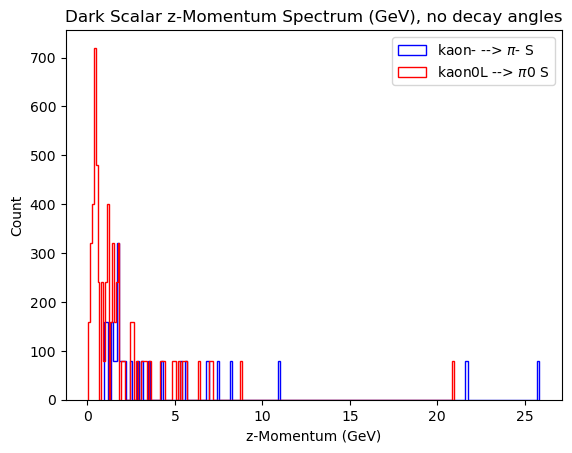

In [52]:
#now plot the z-momentum and the energy, assuming no decay angles whatsoever
plt.hist(p_z_dark_scalar_minus.to_numpy(), bins = 200, color = "blue", histtype = "step", label = "kaon- --> $\pi$- S")
plt.hist(p_z_dark_scalar_0L.to_numpy(), bins = 200, color = "red", histtype = "step", label = "kaon0L --> $\pi$0 S")

plt.title("Dark Scalar z-Momentum Spectrum (GeV), no decay angles")
plt.xlabel("z-Momentum (GeV)")
plt.ylabel("Count")
plt.legend()

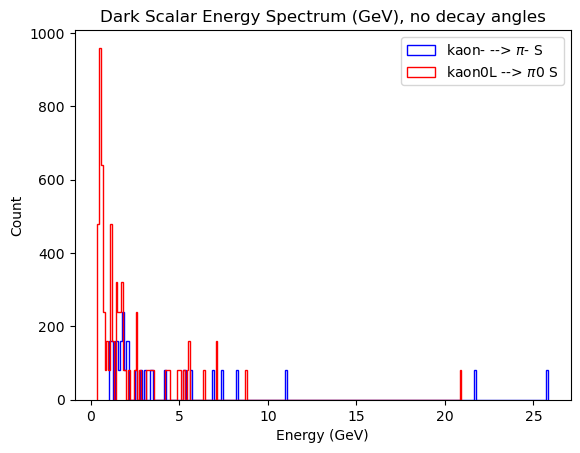

In [53]:
plt.hist(E_dark_scalar_minus.to_numpy(), bins = 200, color = "blue", histtype = "step", label = "kaon- --> $\pi$- S")
plt.hist(E_dark_scalar_0L.to_numpy(), bins = 200, color = "red", histtype = "step", label = "kaon0L --> $\pi$0 S")

plt.title("Dark Scalar Energy Spectrum (GeV), no decay angles")
plt.xlabel("Energy (GeV)")
plt.ylabel("Count")
plt.legend()

In [72]:
#now choose random decay angles and use second fn. above

theta_pion_minus = np.random.uniform(0, 3.14, momentum_kaon_minus.size) #assuming in x-direction, from 0-180 deg.(0-3.14 rad.)
phi_pion_minus = np.random.uniform(0, 6.28, momentum_kaon_minus.size) #assuming in y-direction, from 0-360 deg. (0-6.28 rad.)

theta_pion_0L = np.random.uniform(0, 3.14, momentum_kaon_0L.size) #assuming in x-direction, from 0-180 deg.(0-3.14 rad.)
phi_pion_0L = np.random.uniform(0, 6.28, momentum_kaon_0L.size) #assuming in y-direction, from 0-360 deg. (0-6.28 rad.)

daughters_from_kaon_minus_angles = find_two_daughter_momenta_angles(theta_pion_minus, phi_pion_minus, mass_kaon_minus, mass_dark_scalar_minus, mass_pion_minus,
                                                     momentum_kaon_minus, E_kaon_minus)

daughters_from_kaon_0L_angles = find_two_daughter_momenta_angles(theta_pion_0L, phi_pion_0L, mass_kaon_0L, mass_dark_scalar_0L, mass_pion_0L,
                                                     momentum_kaon_0L, E_kaon_0L)

#print(daughters_from_kaon_minus_angles)

#define all relevant quantities:
E_S_minus_angles = daughters_from_kaon_minus_angles["E_daughter_1_lab"]
E_S_0L_angles = daughters_from_kaon_0L_angles["E_daughter_1_lab"]
p_z_S_minus_angles = daughters_from_kaon_minus_angles["p_daughter_1_z_lab"] 
p_z_S_0L_angles = daughters_from_kaon_0L_angles["p_daughter_1_z_lab"]
p_S_minus_angles = daughters_from_kaon_minus_angles["p_daughter_1_tot_lab"]
p_S_0L_angles = daughters_from_kaon_0L_angles["p_daughter_1_tot_lab"]

/Users/kaylabartel/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in arccos
  result = func(self.values, **kwargs)
/Users/kaylabartel/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in arccos
  result = func(self.values, **kwargs)
/Users/kaylabartel/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in arccos
  result = func(self.values, **kwargs)
/Users/kaylabartel/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in arccos
  result = func(self.values, **kwargs)


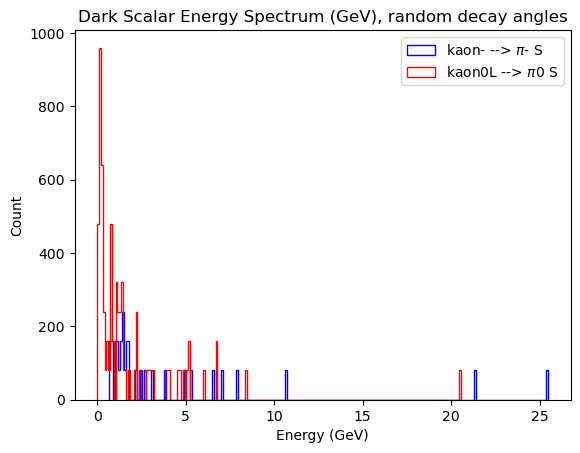

In [73]:
#plot energy spectrum, with random angles
plt.hist(E_S_minus_angles.to_numpy(), bins = 200, color = "blue", histtype = "step", label = "kaon- --> $\pi$- S")
plt.hist(E_S_0L_angles.to_numpy(), bins = 200, color = "red", histtype = "step", label = "kaon0L --> $\pi$0 S")

plt.title("Dark Scalar Energy Spectrum (GeV), random decay angles")
plt.xlabel("Energy (GeV)")
plt.ylabel("Count")
plt.legend()

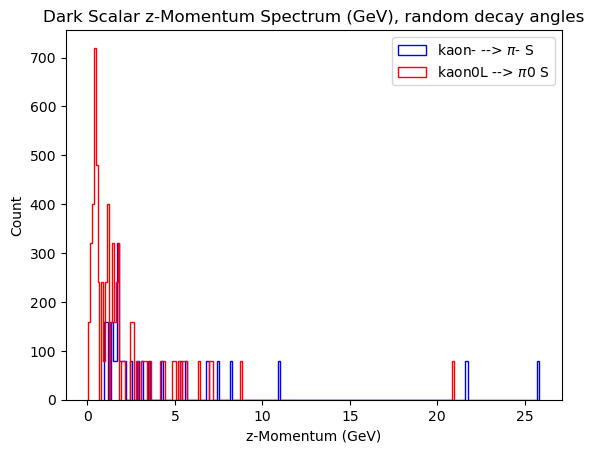

In [74]:
#plot z-mom. with random angles
plt.hist(p_z_S_minus_angles.to_numpy(), bins = 200, color = "blue", histtype = "step", label = "kaon- --> $\pi$- S")
plt.hist(p_z_S_0L_angles.to_numpy(), bins = 200, color = "red", histtype = "step", label = "kaon0L --> $\pi$0 S")

plt.title("Dark Scalar z-Momentum Spectrum (GeV), random decay angles")
plt.xlabel("z-Momentum (GeV)")
plt.ylabel("Count")
plt.legend()

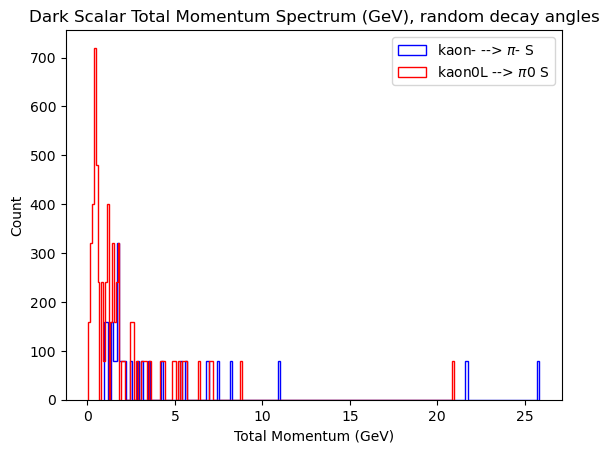

In [75]:
#plot total momentum with random angles
plt.hist(p_S_minus_angles.to_numpy(), bins = 200, color = "blue", histtype = "step", label = "kaon- --> $\pi$- S")
plt.hist(p_S_0L_angles.to_numpy(), bins = 200, color = "red", histtype = "step", label = "kaon0L --> $\pi$0 S")

plt.title("Dark Scalar Total Momentum Spectrum (GeV), random decay angles")
plt.xlabel("Total Momentum (GeV)")
plt.ylabel("Count")
plt.legend()